In [1]:
server = 'https://data.ioos.us/gliders/erddap'

dataset_id = 'blue-20160818T1448'

constraints = {
    'time>=': '2016-07-10T00:00:00Z',
    'time<=': '2017-02-10T00:00:00Z',
    'latitude>=': 38.0,
    'latitude<=': 41.0,
    'longitude>=': -72.0,
    'longitude<=': -69.0,
}

variables = [
 'depth',
 'latitude',
 'longitude',
 'salinity',
 'temperature',
 'time',
]

In [2]:
from erddapy import ERDDAP


e = ERDDAP(
    server=server,
    protocol='tabledap',
)

e.dataset_id = dataset_id
e.constraints = constraints
e.variables = variables
        
print(
    e.get_download_url(
        response='mat',
    )
)

https://data.ioos.us/gliders/erddap/tabledap/blue-20160818T1448.mat?depth,latitude,longitude,salinity,temperature,time&time>=1468108800.0&time<=1486684800.0&latitude>=38.0&latitude<=41.0&longitude>=-72.0&longitude<=-69.0


In [3]:
df = e.to_pandas(
    index_col='time',
    parse_dates=True,
    skiprows=(1,)  # units information can be dropped.
).dropna()

df.head()

,depth,latitude,longitude,salinity,temperature
time,,,,,
2016-08-19 17:41:53,4.58,40.997572,-70.953544,32.241924,22.1122
2016-08-19 17:41:53,5.92,40.997572,-70.953544,32.231640,21.9331
2016-08-19 17:41:53,7.09,40.997572,-70.953544,32.225613,21.7394
2016-08-19 17:41:53,8.25,40.997572,-70.953544,32.231335,21.3219
2016-08-19 17:41:53,10.11,40.997572,-70.953544,32.286210,19.7151


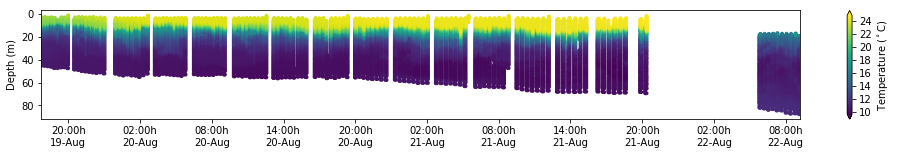

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth'], s=15, c=df['temperature'],
                marker='o', edgecolor='none')

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)');